In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import collections
import calibrateCamera
import gradWarpPipeline
import Line
import laneTracker
%matplotlib inline
import pickle

In [2]:
def plotImages(img1, title1, img2, title2):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(img1)
    ax1.set_title(title1, fontsize=50)
    ax2.imshow(img2)
    ax2.set_title(title2, fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [3]:
# Calibrating the camera with the chess board images
# cc = calibrateCamera.calibrateCamera('./camera_cal/')
# pickle.dump(cc, open( "calibrateCameraObj.p", "wb" ))
cc = pickle.load(open( "calibrateCameraObj.p", "rb" ))

In [4]:
# Displaying a test image after calibration
img = mpimg.imread('./camera_cal/calibration1.jpg')
undist = cc(img)
plotImages(img, "Distorted Image", undist, "Undistorted Image")

In [5]:
# Displaying a test image after calibration
img = mpimg.imread('./test_images/test6.jpg')
undist_road = cc(img)
plotImages(img, "Original Road Image", undist_road, "Undistorted Road Image")

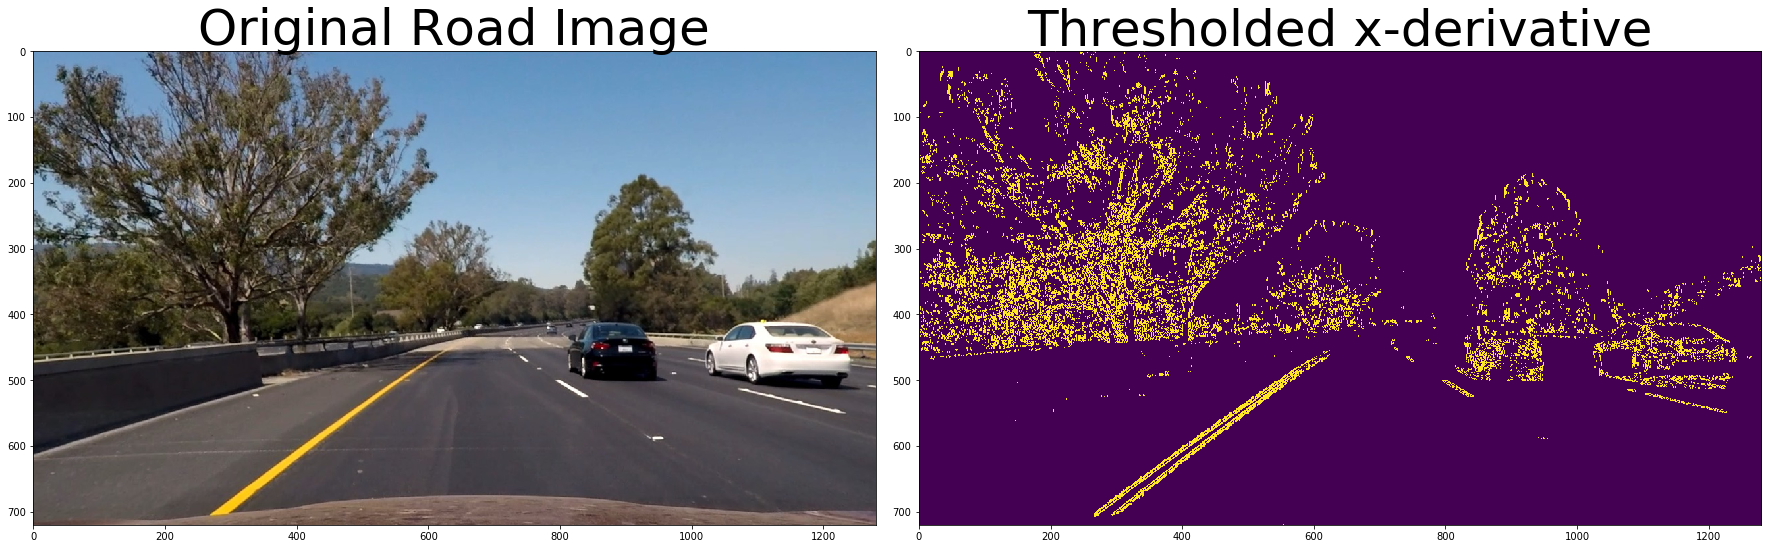

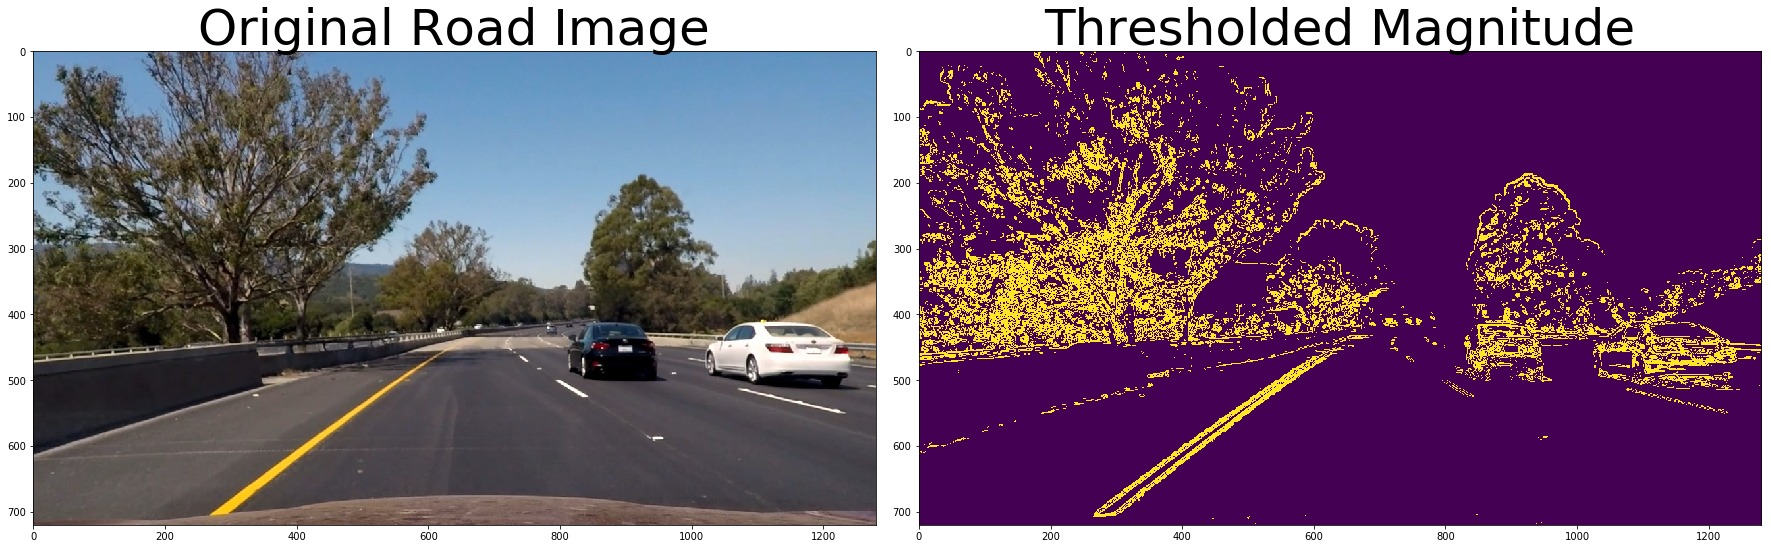

In [6]:
pp = gradWarpPipeline.processingPipeline()
pp.plot_abs_sobel_thresh(undist_road)
pp.plot_mag_sobel_thresh(undist_road)
pp.plot_dir_sobel_thresh(undist_road)
plotImages(undist_road,"Original Road Image", pp(undist_road), "Final Thresholded Binary Image")

In [7]:
warped_image = gradWarpPipeline.gradWarpPipeline()(undist_road)
plotImages(undist_road, "Original Road Image", warped_image, "Warped Image")

In [8]:
# Histogram of the warped image pixels Intensity is denoted by peak
histogram = np.sum(warped_image[warped_image.shape[0]//2:,:], axis=0)
plt.plot(histogram)

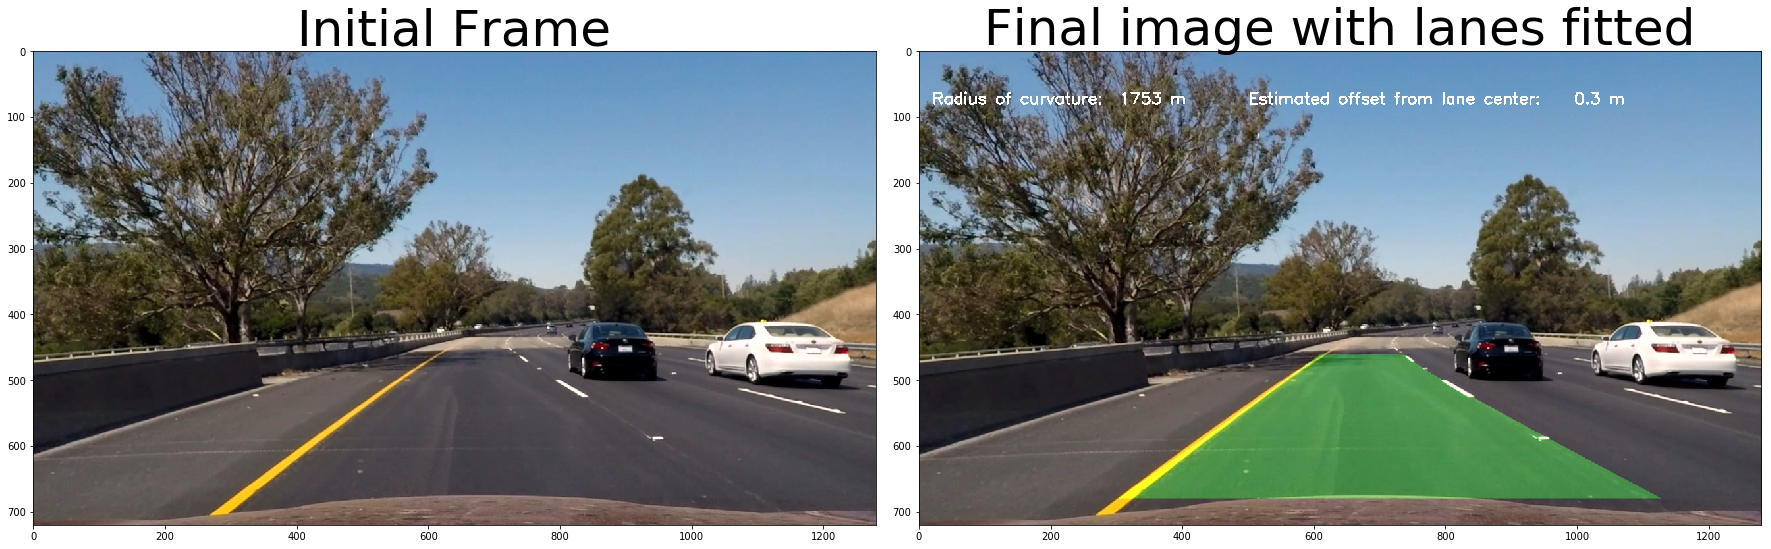

In [9]:
image_with_lanes = laneTracker.laneTracker(np.copy(undist_road)).find_lanes(np.copy(undist_road))
plotImages(undist_road,"Initial Frame", image_with_lanes, "Final image with lanes fitted")

In [11]:
from moviepy.editor import VideoFileClip

video_output_name = 'project_video_annotated_vego.mp4'
#video = VideoFileClip("project_video.mp4").subclip(38,43)
video = VideoFileClip("project_video.mp4")

finder = laneTracker.laneTracker(cc(video.get_frame(0)))
video_output = video.fl_image(finder.find_lanes)
%time video_output.write_videofile(video_output_name, audio=False)

[MoviePy] >>>> Building video project_video_annotated_vego.mp4
[MoviePy] Writing video project_video_annotated_vego.mp4


100%|█████████▉| 1260/1261 [06:12<00:00,  3.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_annotated_vego.mp4 

CPU times: user 4min 54s, sys: 1min 34s, total: 6min 28s
Wall time: 6min 13s
